In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('social-media.csv')

# Fix typo in column name
df.rename(columns={'UsageDuraiton': 'UsageDuration'}, inplace=True)

# Display the first few rows of the dataset
print(df.head())

   UserId  UsageDuration  Age       Country  TotalLikes
0       1              2   55        Turkey           5
1       2              6   45        Canada          10
2       3              3   50       Ireland           7
3       4              4   35  South Africa           5
4       5              1   58        Turkey           2


In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Print the column names
print("Columns:", df.columns.tolist())

Columns: ['UserId', 'UsageDuration', 'Age', 'Country', 'TotalLikes']


In [17]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 UserId           0
UsageDuration    0
Age              0
Country          0
TotalLikes       0
dtype: int64


In [18]:
# Display statistical summary of numerical columns
print("\nStatistical Summary:")
print(df.describe())



Statistical Summary:
          UserId  UsageDuration        Age  TotalLikes
count  63.000000      63.000000  63.000000   63.000000
mean   31.761905       4.000000  33.777778    5.317460
std    18.015866       2.879292  15.540213    6.135106
min     1.000000       1.000000  18.000000    0.000000
25%    16.500000       2.000000  19.000000    1.500000
50%    32.000000       3.000000  26.000000    4.000000
75%    47.500000       5.000000  50.000000    6.000000
max    62.000000      13.000000  60.000000   28.000000


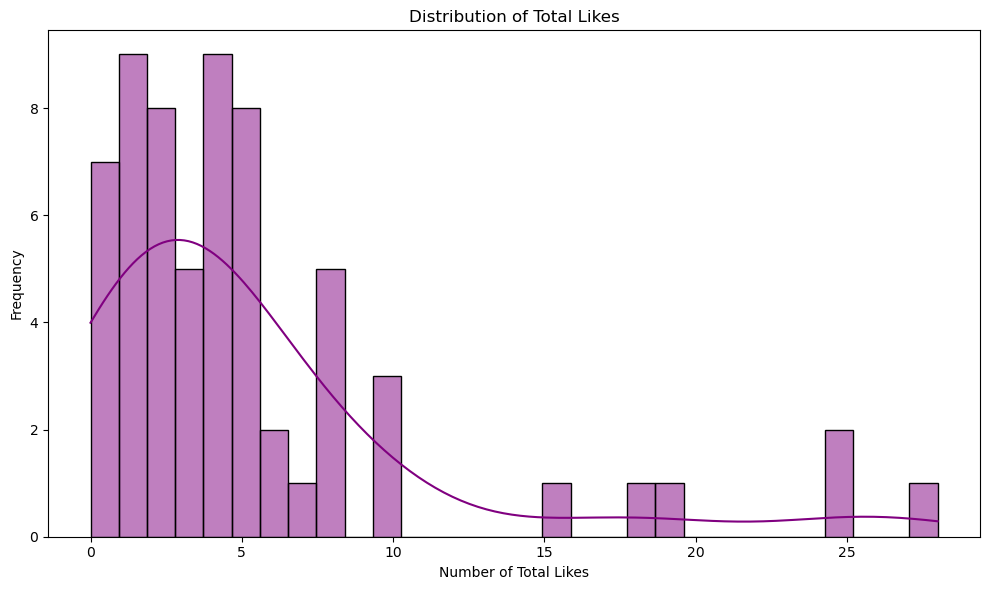

In [19]:
# Plot 1: Distribution of Total Likes
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalLikes'], bins=30, kde=True, color='purple')
plt.title('Distribution of Total Likes')
plt.xlabel('Number of Total Likes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

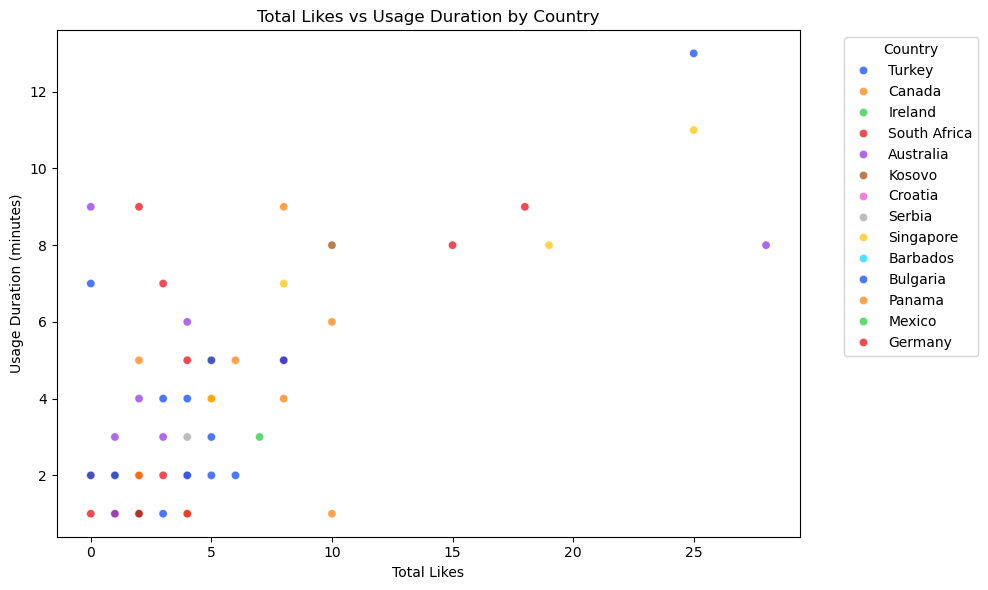

In [20]:
# Plot 2: Total Likes vs Usage Duration Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalLikes', y='UsageDuration', data=df, hue='Country', palette='bright', alpha=0.7)
plt.title('Total Likes vs Usage Duration by Country')
plt.xlabel('Total Likes')
plt.ylabel('Usage Duration (minutes)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [21]:
# Plot 3: Boxplot of Usage Duration
plt.figure(figsize=(8, 6))
sns.boxplot(x='UsageDuration', data=df, color='lightblue')
plt.title('Boxplot of Usage Duration')
plt.xlabel('Usage Duration (minutes)')
plt.tight_layout()
plt.show()

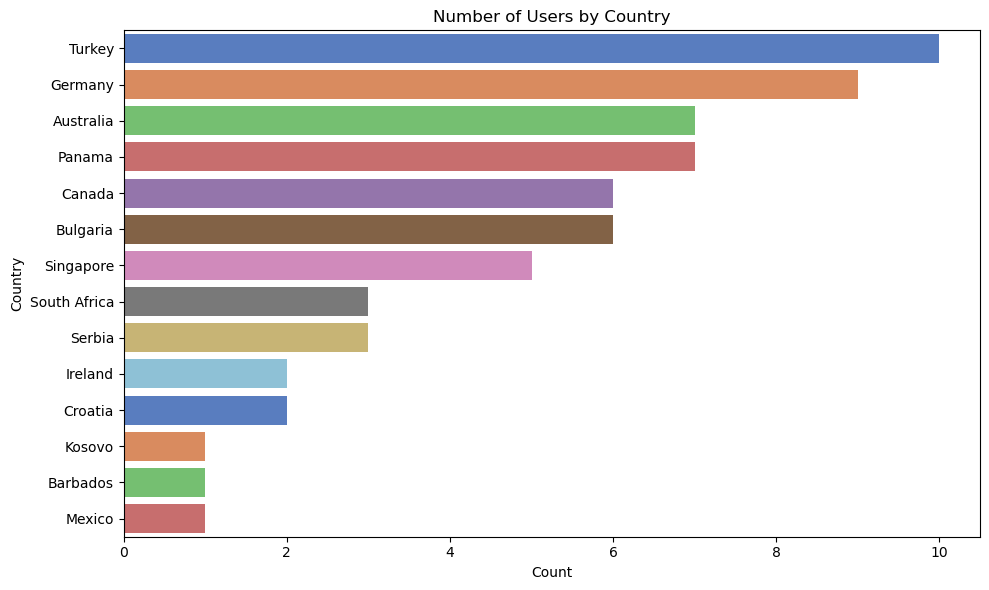

In [22]:
# Plot 4: Countplot of Users by Country
plt.figure(figsize=(10, 6))
sns.countplot(y='Country', data=df, palette='muted', order=df['Country'].value_counts().index)
plt.title('Number of Users by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


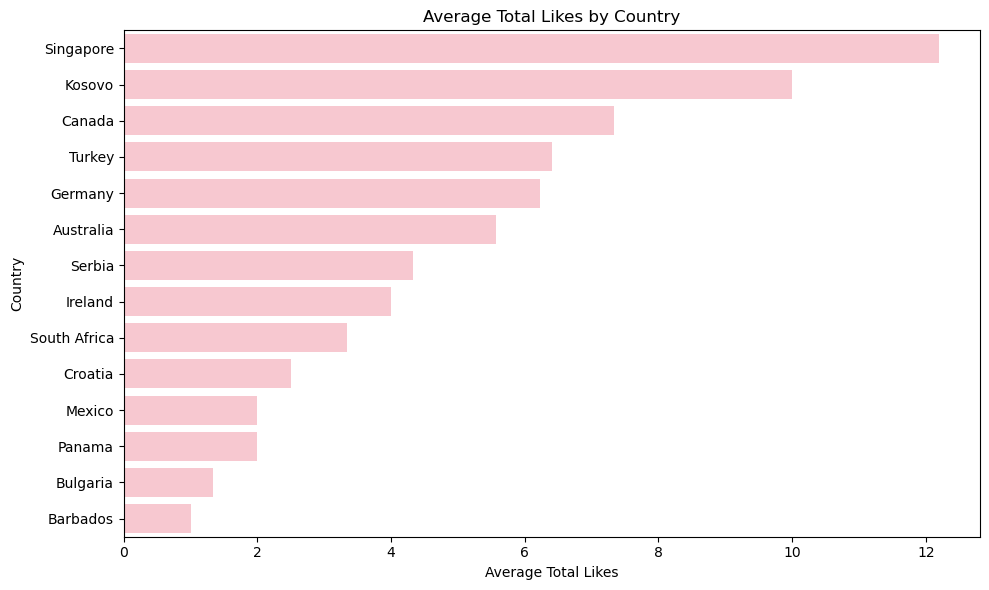

In [23]:
# Plot 5: Average Total Likes by Country (Bar Plot)
plt.figure(figsize=(10, 6))
likes_by_country = df.groupby('Country')['TotalLikes'].mean().sort_values(ascending=False)
sns.barplot(x=likes_by_country.values, y=likes_by_country.index, color='pink', ci=None)
plt.title('Average Total Likes by Country')
plt.xlabel('Average Total Likes')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

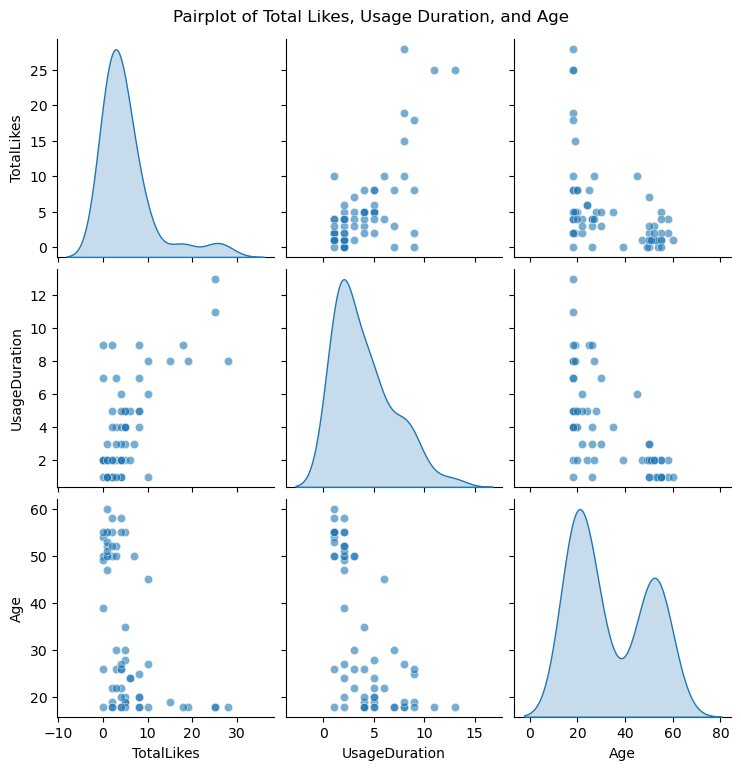

In [24]:
# Plot 6: Pairplot of Numerical Variables
sns.pairplot(df[['TotalLikes', 'UsageDuration', 'Age']], diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pairplot of Total Likes, Usage Duration, and Age', y=1.02)
plt.show()


In [25]:
# Plot 7: Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df[['TotalLikes', 'UsageDuration', 'Age']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


Age Group Stats:
   AgeGroup  TotalLikes  UsageDuration  User  Count
0    18-29    7.685714       5.485714           35
1    30-44    3.250000       4.000000            4
2    45-59    2.260870       1.869565           23
3      60+    1.000000       1.000000            1


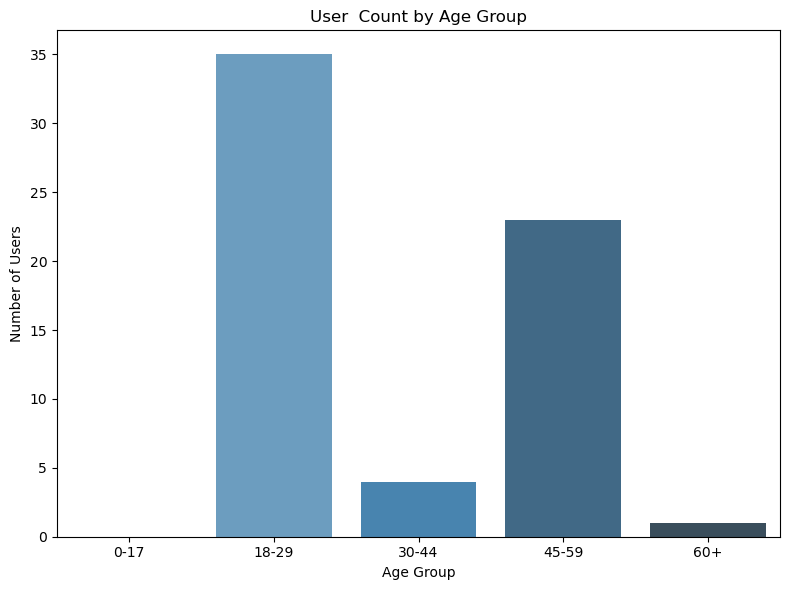

In [26]:
# Define age bins and labels
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-17', '18-29', '30-44', '45-59', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
# Group by AgeGroup and calculate average metrics
age_group_stats = df.groupby('AgeGroup', observed=True).agg({
    'TotalLikes': 'mean',
    'UsageDuration': 'mean',
    'UserId': 'count'  # Use the correct column name
}).rename(columns={'UserId': 'User  Count'}).reset_index()
print("\nAge Group Stats:\n", age_group_stats)
# Plot average Total Likes by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='TotalLikes', data=age_group_stats, palette='Set2')
plt.title('Average Total Likes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Likes')
plt.tight_layout()
plt.show()
# Plot average Usage Duration by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='UsageDuration', data=age_group_stats, palette='Set3')
plt.title('Average Usage Duration by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Usage Duration (minutes)')
plt.tight_layout()
plt.show()
# Plot User Count by Age Group
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='User  Count', data=age_group_stats, palette='Blues_d')
plt.title('User  Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()